In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading text cleaning packages
import neattext.functions as nfx

In [3]:
from sklearn.linear_model import LogisticRegression as lg
from sklearn.naive_bayes import MultinomialNB as mnb

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [5]:
df=pd.read_csv("C:\\Users\\Administrator\\Downloads\\emotion_dataset_raw.csv")

In [36]:
df[df["Emotion"]=="neutral"]

,Emotion,Text
0,neutral,Why ?
61,neutral,My mother-in-law used to do the same thing to...
68,neutral,"Well , I didn't think so at first . But as we..."
76,neutral,Once in a while .
114,neutral,So ?
...,...,...
34745,neutral,How's it ?
34750,neutral,John .
34765,neutral,Sure .
34771,neutral,Too bad .


In [ ]:
# disgust

In [37]:
df["Text"][68]

" Well , I didn't think so at first . But as we started talking , I found him extremely funny and witty . I couldn't stop laughing at his jokes ! And we have so much in common . We like the same team , music , and most amazingly , we both love Chinese food ! I have the feeling that we are going to be great friends . "

In [21]:
df["Text"][204]

'I understand the mood but if some of them are disgruntled they are entitled to call an EGM . '

In [22]:
# shame

In [24]:
df["Text"][610]

'I also remember being extremely ashamed at some of the racist chants the Leeds fans were coming out with that night . '

In [7]:
df.Emotion.value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot: xlabel='Emotion', ylabel='count'>

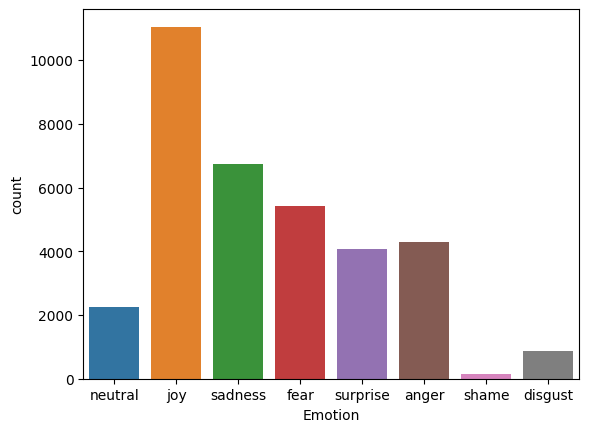

In [8]:
sns.countplot(data=df,x="Emotion")

Exploration
* Text Cleaning
* Sentiment Analysis
* Keyword Extraction
   * Keywords for each emotion
   * Wordcloud

In [9]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [10]:
# Remove userhandles
df["Cleaned_Text"]=df["Text"].apply(nfx.remove_userhandles)

In [11]:
df

,Emotion,Text,Cleaned_Text
0,neutral,Why ?,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz for u .! babe naamazed ...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,have you gift! Hope you like it! It's hand m...
34788,joy,The world didnt give it to me..so the world MO...,The world didnt give it to me..so the world MO...
34789,anger,A man robbed me today .,A man robbed me today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu call it JEALOUSY, I call it of #Losing YO..."


In [12]:
# Remove stopwords
df["Cleaned_Text"]=df["Cleaned_Text"].apply(nfx.remove_stopwords)

In [13]:
df

,Emotion,Text,Cleaned_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [14]:
# Remove special characters
df["Cleaned_Text"]=df["Cleaned_Text"].apply(nfx.remove_special_characters)

In [15]:
df

,Emotion,Text,Cleaned_Text
0,neutral,Why ?,
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e b...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,anger,A man robbed me today .,man robbed today
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY Losing YOU


In [16]:
# Lowering All The words
df["Cleaned_Text"]=df["Cleaned_Text"].str.lower()

In [17]:
# sentiment Analysis
from textblob import TextBlob

In [18]:
def sentiment(text):
    blob=TextBlob(text)
    sentiment=blob.sentiment.polarity
    if sentiment > 0:
        result="Positive"
    elif sentiment < 0:
        result="Negative"
    else:
        result="Neutral"
    return result

In [19]:
df["sentiment"]=df["Cleaned_Text"].apply(sentiment)

In [20]:
df

,Emotion,Text,Cleaned_Text,sentiment
0,neutral,Why ?,,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,sage act upgrade list tommorow,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,way homegirl baby funeral man hate funerals sh...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant regular feat...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e b...,Neutral
...,...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift hope like it hand wear itll warm lol,Positive
34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world definitely cnt away,Neutral
34789,anger,A man robbed me today .,man robbed today,Neutral
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",youu jealousy losing you,Neutral


<AxesSubplot: xlabel='Emotion,sentiment'>

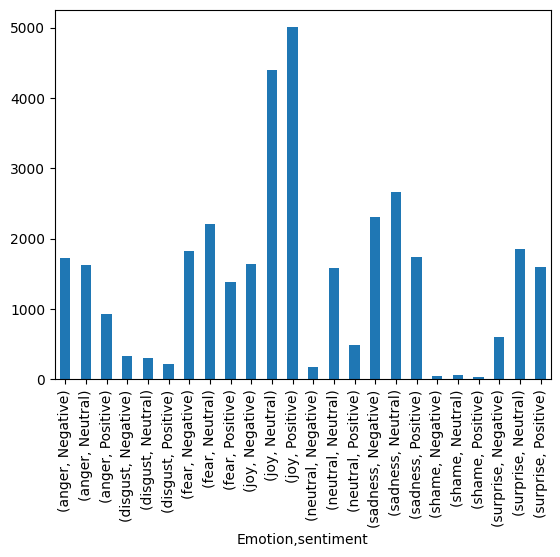

In [21]:
df.groupby(["Emotion","sentiment"]).size().plot(kind="bar")

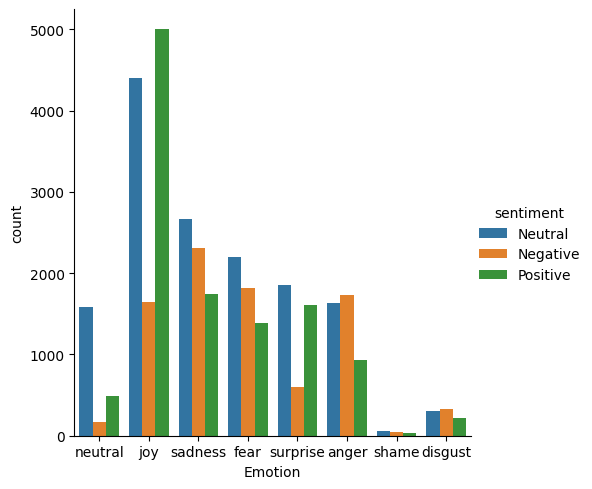

In [22]:
sns.catplot(x="Emotion",hue="sentiment",data=df,kind="count")

In [23]:
df.groupby(["Emotion","sentiment"]).size()

Emotion   sentiment
anger     Negative     1731
          Neutral      1631
          Positive      935
disgust   Negative      330
          Neutral       306
          Positive      220
fear      Negative     1824
          Neutral      2203
          Positive     1383
joy       Negative     1644
          Neutral      4399
          Positive     5002
neutral   Negative      171
          Neutral      1589
          Positive      494
sadness   Negative     2310
          Neutral      2671
          Positive     1741
shame     Negative       46
          Neutral        64
          Positive       36
surprise  Negative      605
          Neutral      1853
          Positive     1604
dtype: int64

In [24]:
df.isnull().sum()

Emotion         0
Text            0
Cleaned_Text    0
sentiment       0
dtype: int64

### keyword Extraction
Extract most common words per clas of emotion

In [25]:
from collections import Counter

In [26]:
def extract_keywords(text,num=50):
    tokens=[tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [27]:
df["Emotion"].unique()

array(['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame',
       'disgust'], dtype=object)

In [28]:
joy_list=df[df["Emotion"]=="joy"]["Cleaned_Text"].tolist()

In [29]:
joy_doc=" ".join(joy_list)

In [30]:
joy_doc

'sage act upgrade list tommorow eye  true hazel eyeand brilliant  regular features  open countenance  complexion  oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness  ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life  leopold truly happy  hopes prayers beloved son come fruition  feeling fail french fuckfrench goodlet   fell love x overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing  selected study university yeah   ages   passed ba exams class results heard selected fot year university zambia form chikola secondary school welp time study days heading campus rain grad photos feeling awesome  brings  ive bought christmas presents trawl loads shops  shit pants pure 100 gravy life  leopold truly happy  hopes prayers beloved son come fruition  class jamming paper quarter 

In [31]:
from wordcloud import WordCloud

In [32]:
def word_cloud(doc):
    mywordcloud=WordCloud().generate(doc)
    plt.imshow(mywordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()

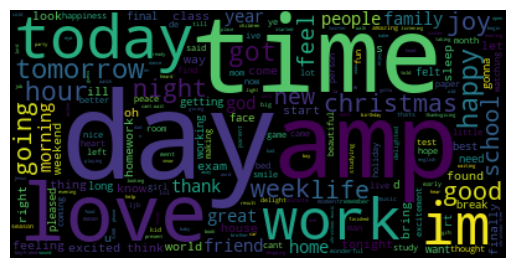

In [33]:
word_cloud(joy_doc)

In [34]:
# Extract Keywords
keyword_joy=extract_keywords(joy_doc)

In [35]:
keyword_joy

{'day': 782,
 'time': 706,
 'im': 696,
 'amp': 679,
 'christmas': 622,
 'love': 593,
 'work': 554,
 'today': 524,
 'like': 497,
 'tomorrow': 493,
 'happy': 487,
 'good': 432,
 'joy': 398,
 'got': 392,
 'going': 366,
 'night': 350,
 'school': 341,
 'morning': 325,
 'home': 322,
 'life': 303,
 'feel': 269,
 '2': 267,
 'great': 256,
 'hours': 253,
 'week': 239,
 'family': 237,
 'year': 231,
 'cant': 230,
 'god': 223,
 'tonight': 221,
 'long': 218,
 'people': 216,
 'new': 216,
 'days': 214,
 'me': 212,
 'oh': 209,
 'sleep': 192,
 's': 188,
 'know': 188,
 'feeling': 180,
 'hour': 179,
 'friend': 173,
 'felt': 170,
 'rt': 170,
 'it': 169,
 'break': 165,
 'friends': 165,
 'best': 163,
 'think': 161,
 'u': 160}

In [36]:
neutral_list=df[df["Emotion"]=="neutral"]["Cleaned_Text"].tolist()

In [37]:
neutral_doc=" ".join(neutral_list)

In [38]:
neutral_doc

' motherinlaw thing  disciplining  disciplining  complained food fed  schools sent  sun   think  started talking  found extremely funny witty  stop laughing jokes  common  like team  music  amazingly  love chinese food  feeling going great friends     better prepare examination   beach school  yes  good informative  think people underestimate value tv education     look good  irritable  understand program  thats     damage  ok  guy  want improve handwriting  ive practiced weeks  happened   handwriting bad  certainly  ok  bye   bet  company decided cancel trip hong kong   wish store close open 24  house day  enjoy making movie  heard stories disagreement actors director     sure  ask directions coffee shop  like return book   42   plot new movie  oh  yes shoot pool  yes   magazine arrives post beginning month  buy magazines  bye  yes  going university courses  oh   im  sounds good  lets   sorry   know  crossing road pay attention whats   hi  walter    find table ill drinks  possibly  br

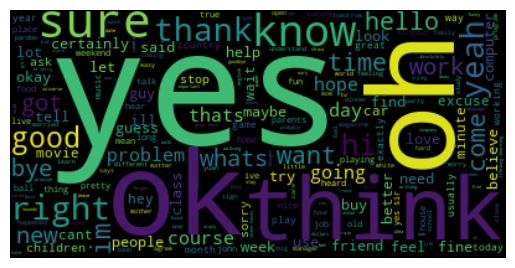

In [39]:
word_cloud(neutral_doc)

In [40]:
keyword_neutral=extract_keywords(neutral_doc)

In [41]:
keyword_neutral

{'yes': 155,
 'oh': 68,
 'ok': 65,
 'like': 64,
 'think': 58,
 'sure': 58,
 'know': 49,
 'right': 49,
 'good': 47,
 'im': 46,
 'yeah': 46,
 'hi': 40,
 'time': 29,
 'thank': 28,
 'come': 27,
 'hello': 27,
 'want': 24,
 'whats': 24,
 'got': 24,
 'bye': 23,
 'new': 23,
 'problem': 22,
 'thats': 21,
 'going': 20,
 'course': 20,
 'hope': 20,
 'certainly': 19,
 'need': 19,
 'thanks': 19,
 'people': 18,
 'feel': 18,
 'work': 18,
 'fine': 18,
 'lot': 18,
 'look': 17,
 'sorry': 17,
 'okay': 17,
 'maybe': 17,
 'ill': 16,
 'find': 15,
 'guy': 14,
 'day': 14,
 'tell': 14,
 'try': 14,
 'use': 14,
 'help': 14,
 'said': 14,
 'believe': 14,
 'love': 13,
 'better': 13}

In [42]:
sadness_list=df[df["Emotion"]=="sadness"]["Cleaned_Text"].tolist()

In [43]:
sadness_doc=" ".join(sadness_list)

In [44]:
sadness_doc

'way homegirl baby funeral man hate funerals shows blessed couldnt wait live missing nh7 wasnt painful enuf suraj s performing gig delhi people hide fake smile shakuhachi dress 580 1022 mm lens 708 pain  oh  thats bad  doctor  welcome glad night love you leave  im gonna miss much losing something going fat burger dinner dad homies ride ponies look like sad puppy wanttoride ankleneedstoheal omg december 5th windows open house mr winter you jack frost missing too thought agreed   going weeks rework  bro team lost  played swag freshcut moment terror drink hot chocolate knowing burn mouth  lot pressure  boss pushy  assigned projects  deadlines near  finished projects  sink broken 2night going lambnow pbj apparently lost bestfriend rarely desperate need talk to tonight nights sleeping im loss sr hs class counselors died hepatitis sensitive knew shyness drew improve image missed funeral  publically grieve parents understand noooooo pongan super torpe las 9 de la maana entendemos que nadie lo

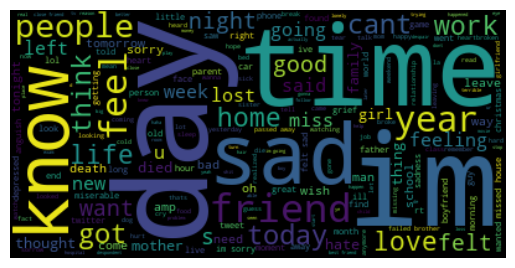

In [45]:
word_cloud(sadness_doc)

In [46]:
keyword_sadness=extract_keywords(sadness_doc)

In [47]:
keyword_sadness

{'im': 574,
 'sad': 424,
 'time': 336,
 'like': 320,
 'day': 252,
 'cant': 249,
 'died': 235,
 'sorry': 235,
 'felt': 232,
 'know': 230,
 'friend': 229,
 'feel': 224,
 'miss': 207,
 'home': 203,
 'got': 199,
 'going': 193,
 's': 191,
 'people': 182,
 'today': 181,
 'good': 166,
 'love': 164,
 'think': 164,
 'me': 153,
 'life': 153,
 'away': 153,
 'work': 150,
 'friends': 149,
 'left': 149,
 'it': 145,
 'night': 142,
 'oh': 139,
 'want': 136,
 'school': 136,
 'bad': 131,
 'years': 130,
 'u': 122,
 'lost': 119,
 'death': 119,
 'right': 117,
 'said': 117,
 'tomorrow': 113,
 'year': 111,
 'mother': 110,
 'ill': 109,
 'family': 108,
 'days': 107,
 'depressed': 106,
 'miserable': 104,
 'thought': 103,
 'amp': 103}

In [48]:
fear_list=df[df["Emotion"]=="fear"]["Cleaned_Text"].tolist()

In [49]:
fear_doc=" ".join(fear_list)

In [50]:
fear_doc

'im expecting extremely important phonecall minute terror opportunity assault laughter stand  mark twain emotionalcourage primitive instinct thats friendit warns pay attention ur dangerit tells act save riding friend car speed 120 kmh snowcovered motorway liked out friend misunderstood know heartoflife good  xaxaadd things symptom called nervoso xaxau wanna learn  bank secret dismay virgin s venture airlines  years ago father ill stayed hospital long time experienced terrible feeling lose him quotthe family bedrock society protect institution marriage country fallquot dismay way kids savaging flora stonethwaite good example   shakiest 14point lead history college football lol people trapped elevator actually stairs time let wear  quote life heard father found letter boyfriend calling talk it results seeing walk situation wo lord faith realizing gets b4 do shot horrified look  applicable myself years ago saw film tv makes afraid seeing stray dog run right pass morehouse campus 12 years 

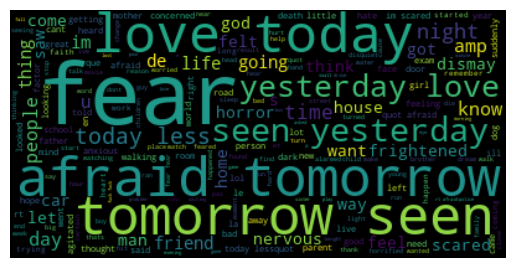

In [51]:
word_cloud(fear_doc)

In [52]:
keyword_fear=extract_keywords(fear_doc)

In [53]:
keyword_fear

{'afraid': 577,
 'fear': 491,
 'love': 487,
 'today': 408,
 'tomorrow': 405,
 'seen': 364,
 'yesterday': 354,
 'im': 293,
 'time': 266,
 'less': 257,
 'night': 243,
 'me': 233,
 'scared': 195,
 'know': 183,
 'people': 182,
 'like': 179,
 'amp': 174,
 'home': 160,
 's': 156,
 'life': 155,
 'going': 154,
 'day': 150,
 'u': 137,
 'frightened': 132,
 'car': 131,
 'horror': 129,
 'felt': 129,
 'way': 126,
 'think': 118,
 'god': 117,
 'de': 115,
 'it': 114,
 'got': 111,
 'nervous': 108,
 'face': 108,
 'feel': 105,
 'man': 103,
 'quot': 103,
 '2': 103,
 'dismay': 102,
 'saw': 99,
 'house': 99,
 'rt': 95,
 'look': 92,
 'anxious': 91,
 'let': 90,
 'friend': 87,
 'la': 87,
 'lessquot': 87,
 'dark': 86}

In [54]:
surprise_list=df[df["Emotion"]=="surprise"]["Cleaned_Text"].tolist()

In [55]:
surprise_doc=" ".join(surprise_list)

In [56]:
surprise_doc

'maken tip 2 stop op een moment dat je het hele project wel ziet zitten nu dus derestkomtlaterwel en dan krijg je ff een cadeautje van een tweep melike drummer boy bij op verzoek van   welke uitvoering van wie haha course come home different house leave parents redo entire downstairs warning reeeeeellllyyyyyyy need tell something guess what phone fucked up gotohellmexicanphone ending pooped pants end weeks crazy ending decoded pop amp roll floor  alleen nog morgen cadootjes kopen stadje en dan helemaal klaar im planet im planets hold life amp discovered good morning store today enjoytheday forgot hair red looked mirror stopped today gas small town attendant came tell quotwe service young tweeters clue cant wait open christmas prezzie christmas decorating entire house christmas cheer mommy iemand nog surprise idee voor een vrouw trouble comes realise gone watching reruns living one oh thought id stop spend christmas holidays lake miss you chocomousse vergt 175 ml slagroom dat heb ik dus

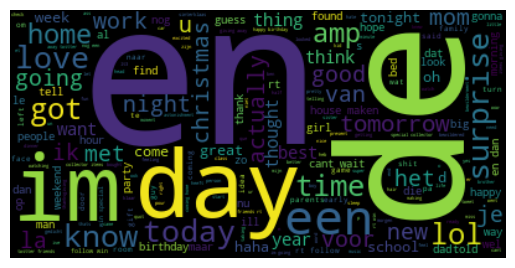

In [57]:
word_cloud(surprise_doc)

In [58]:
keyword_surprise=extract_keywords(surprise_doc)

In [59]:
keyword_surprise

{'en': 334,
 'een': 307,
 'im': 293,
 'de': 260,
 'home': 176,
 'know': 169,
 'rt': 165,
 'ik': 164,
 'today': 163,
 'van': 162,
 'surprise': 161,
 'day': 161,
 'love': 157,
 'got': 146,
 'nog': 141,
 'lol': 138,
 'christmas': 134,
 'met': 132,
 'time': 131,
 'je': 130,
 'like': 128,
 'going': 127,
 'amp': 126,
 'good': 122,
 'birthday': 122,
 'voor': 118,
 'tomorrow': 112,
 'het': 109,
 'wait': 105,
 'actually': 101,
 'coming': 99,
 'u': 98,
 'night': 96,
 'win': 96,
 'cant': 95,
 'dan': 94,
 'happy': 91,
 'new': 89,
 'mom': 89,
 'think': 87,
 'twitter': 85,
 'friends': 83,
 'best': 81,
 'la': 81,
 'op': 78,
 'great': 77,
 'thought': 76,
 'party': 76,
 'nu': 75,
 'people': 74}

In [60]:
anger_list=df[df["Emotion"]=="anger"]["Cleaned_Text"].tolist()

In [61]:
anger_doc=" ".join(anger_list)

In [62]:
anger_doc

'bull tossed effigy hands infuriated    everybody   talk  kill work number slakers wandering around nothing parents allow social function friends attending tried rape best friends claimed fault hassled her claimed loose threatened sue her effect smoking reefer juvenile emotion simple minded creature express suppressing annoyance called  little sara   replied  sly left feeling absolutely livid  left student newspaper chinese university table library disappeared came back dipped cotton wool water dabbed livid puffy eyes  soud like neighbours hell  teachers suspicious popularity  annoyed lack interest academic work infuriated achieve high marks examinations  broke artistic work weeks changes broken permission right this impossible  cheated  disappointed actually consider taylor swift role eponine movie version les mis informed flatmate that wed moved flat shed expected buy food separetely  event actually happened 5 months sharing began prior this said nothing impression arouse anger see a

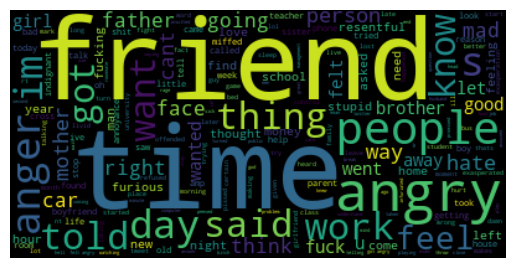

In [63]:
word_cloud(anger_doc)

In [64]:
keyword_anger=extract_keywords(anger_doc)

In [65]:
keyword_anger

{'angry': 318,
 'anger': 224,
 'time': 208,
 'people': 208,
 'friend': 200,
 'im': 178,
 'like': 168,
 's': 163,
 'got': 155,
 'me': 152,
 'said': 132,
 'day': 132,
 'told': 132,
 'felt': 130,
 'hate': 127,
 'work': 125,
 'want': 122,
 'it': 117,
 'cant': 114,
 'know': 108,
 'mad': 105,
 'feel': 104,
 'person': 96,
 'going': 95,
 'way': 91,
 'mother': 90,
 'face': 88,
 'home': 87,
 'good': 87,
 'right': 86,
 'things': 86,
 'think': 80,
 'friends': 79,
 'away': 78,
 'furious': 77,
 'exasperation': 76,
 'wanted': 76,
 'went': 75,
 'car': 74,
 'father': 73,
 'brother': 71,
 'school': 71,
 'fuck': 71,
 'let': 69,
 'man': 69,
 'annoyance': 68,
 'resentful': 68,
 'thought': 68,
 'indignant': 67,
 'night': 66}

In [66]:
shame_list=df[df["Emotion"]=="shame"]["Cleaned_Text"].tolist()

In [67]:
shame_doc=" ".join(shame_list)

In [68]:
shame_doc

'doubted  failed recognise temporary financial embarrassment   s  playing infant games   demanded  gratified flush embarrassment tristram s cheek  remember extremely ashamed racist chants leeds fans coming night  jasper reddened pressed lip  farraline looked embarrassed  getting increasingly embarrassed mattie sat waiting oneill  mortified  nt appear presentation ceremony nt receive medal memento occasion  men  women  embarrassed noises dissent  americans ashamed kind attitude  ashamed feeling sorry transfer pity  irresistible hesitated  embarrassed taken long  gazed embarrassed  young farm worker enjoys leg pulled taunts  yokel   country bumpkin pubs discothques eventually ashamed admitting occupation  old people little embarrassment bodily functions  husbands wives stuff takenforgranted childhood  decided drop note carla s letterbox cope embarrassment phone  m ashamed suspected   nt home business associates dinner embarrassed   sense  course  including biblical   added penetrating wh

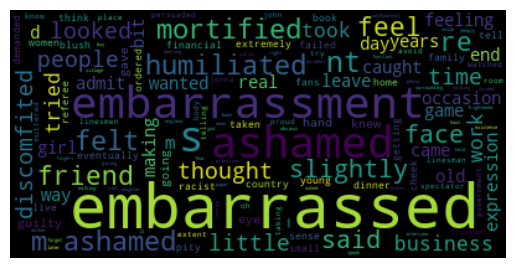

In [69]:
word_cloud(shame_doc)

In [70]:
keyword_shame=extract_keywords(shame_doc)

In [71]:
keyword_shame

{'embarrassed': 64,
 'ashamed': 35,
 'embarrassment': 28,
 's': 25,
 'm': 11,
 'nt': 9,
 'mortified': 8,
 'humiliated': 8,
 'felt': 8,
 're': 7,
 'slightly': 6,
 'feel': 6,
 'face': 6,
 'said': 6,
 'looked': 5,
 'people': 5,
 'little': 5,
 'discomfited': 5,
 'business': 4,
 'friends': 4,
 'took': 4,
 'time': 4,
 'thought': 4,
 'tried': 4,
 'occasion': 3,
 'old': 3,
 'came': 3,
 'caught': 3,
 'expression': 3,
 'leave': 3,
 'way': 3,
 'making': 3,
 'd': 3,
 'years': 3,
 'bit': 3,
 'friend': 3,
 'work': 3,
 'real': 3,
 'wanted': 3,
 'guilty': 3,
 'knew': 3,
 'going': 3,
 'gave': 3,
 'failed': 2,
 'financial': 2,
 'demanded': 2,
 'extremely': 2,
 'racist': 2,
 'fans': 2,
 'getting': 2}

### splitting target and independent features

In [72]:
X=df["Cleaned_Text"]

In [73]:
y=df["Emotion"]

In [74]:
y.value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [76]:
# train-test-split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=86,test_size=0.2)

In [77]:
# build pipeline
from sklearn.pipeline import Pipeline

In [78]:
pipe_lr=Pipeline(steps=([("cv",CountVectorizer()),("lr",lg())]))

In [79]:
pipe_lr.fit(x_train,y_train)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [80]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [81]:
pipe_lr.score(x_test,y_test)

0.6309814628538584

In [86]:
# Make a Prediction
ex1="This book was so interesting it made me happy"

In [87]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [88]:
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [89]:
# Save model and Pipeline
import joblib
pipeline_file=open("emotion_classifier_pipe_lr.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()